# EDA - 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

Ans. The key features of the wine quality data set and their importance in predicting the quality of wine is as follows:

1. Fixed Acidity: This represents the concentration of non-volatile acids in the wine. Acidity is a crucial factor in determining the overall taste and balance of the wine. Too much acidity can make the wine taste sour, while too little can make it taste flat.

2. Volatile Acidity: This refers to the concentration of volatile acids in the wine. High levels of volatile acidity can contribute to off-putting vinegar-like aromas and flavors, negatively impacting wine quality.

3. Citric Acid: Citric acid is a weak organic acid found in citrus fruits. It can provide a fresh and citrusy character to the wine, enhancing its aroma and overall perception of freshness.

4. Residual Sugar: This is the amount of sugar that remains in the wine after fermentation. It can affect the wine's sweetness level and perceived balance. Wines with higher residual sugar are generally sweeter.

5. Chlorides: The concentration of chlorides can impact the wine's taste and mouthfeel. Higher chloride levels may contribute to a salty or briny taste, which can be undesirable in most wines.

6. Free Sulfur Dioxide: Sulfur dioxide is often added to wines as a preservative. The free form of sulfur dioxide can help prevent spoilage and oxidation. It also plays a role in maintaining the wine's overall freshness.

7. Total Sulfur Dioxide: This includes both free and bound forms of sulfur dioxide. Too much sulfur dioxide can lead to off-flavors and negatively affect the wine's aroma and taste.

8. Density: Density is an important parameter that can provide insights into the wine's overall composition and concentration of various components, including alcohol and sugar.

9. pH: The pH level of the wine is a measure of its acidity. It influences the wine's stability, color, taste, and overall balance. Wines with a balanced pH are generally considered more desirable.

10. Sulphates: Sulphates, also known as sulfites, are compounds that can help prevent microbial growth and oxidation in wine. They are added in controlled amounts during winemaking. Too much sulfur can lead to negative effects on taste and aroma.

11. Alcohol: The alcohol content of the wine significantly impacts its body, flavor, and overall perception. Wines with appropriate alcohol levels tend to be more harmonious and enjoyable.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

Ans. Some common impoutation techniques which can be used to fill missing values:

- Mean: If the ferature is a numerical feature, we can fill the mean of column in place of all null values. The disadvantage is that if there are outliers in our data then mean can be significantly deviated and can result in wrong results. It's advantage is that it works well when data is Missing Completely At Random(MCAR).

- Median: Median of features can also be used to fill null values if the feature is a continuous numerical feature. It's advantage is that it doesn't deviate much even if oultiers are present. But it cannot be used on categorical features.

- Mode: Mode of data can also be used to fill the null values, both in numerical and categorical features. But it is majorly used to fill null values of categorical features. It doesn't work well with continuous numerical features.

The wine quality dataset has no null values, so there is no need to use any imputation techniques. The code below shows this:

In [4]:
print('The number of null values in wine quality dataset:')
df.isnull().sum()

The number of null values in wine quality dataset:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
student = pd.read_csv('StudentsPerformance.csv')
student.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Ans. The key factors that affect students' performance in exams from dataset are:

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test

For analyzing these factors we can find the mean marks of different categories or we can draw distribution plots.

For example, we create a column of averge marks and then create a distribution plot for all factors

In [7]:
student['total_score']=student['math score']+student['writing score']+student['reading score']
student['average']=(student['total_score']/3).round(2)
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


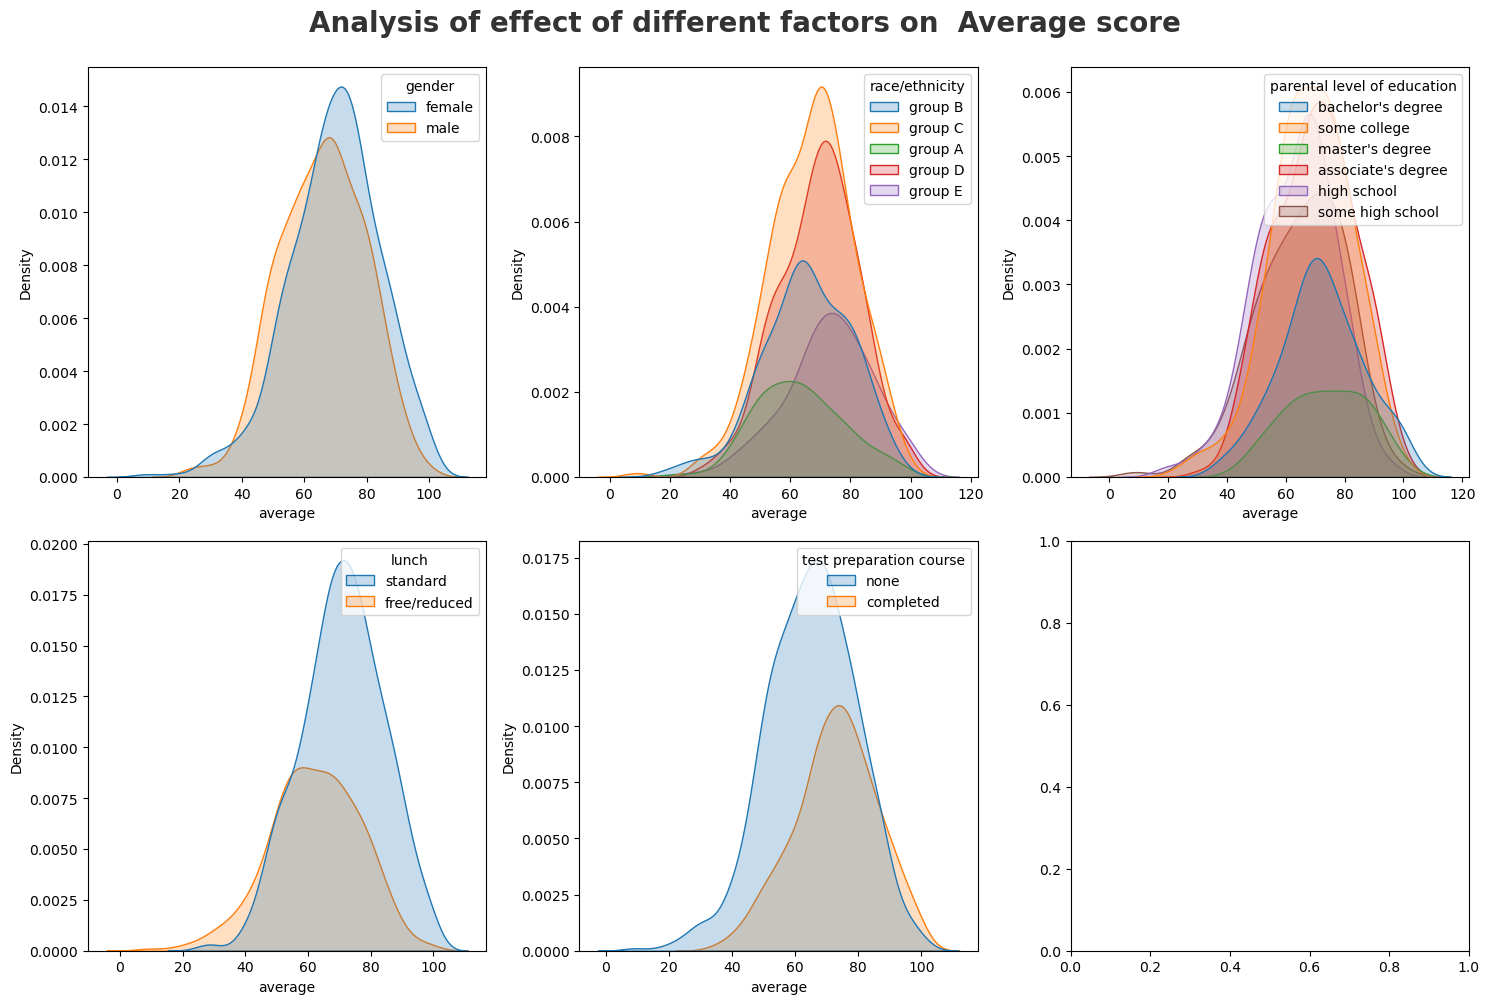

In [8]:
factor = list([col for col in student.columns if student[col].dtypes=='O'])

plt.subplots(2,3,figsize=(15,10))
plt.suptitle('Analysis of effect of different factors on  Average score', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0,len(factor)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=student['average'], fill=True, hue=student[factor[i]])
    plt.xlabel='Average Score'
    plt.tight_layout()

Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Ans. In the student performance dataset, we have 5 categorical features which we can transform accordingly:

1. gender : we can use One Hot Encoding as there is no order                      
2. race/ethnicity : here  we can use target guided ordinal encoding because in the above plot it is visible that average marks depend on race/ethnicity
3. parental level of education : here also we can use target guided ordinal encoding because in the above plot it is visible that average marks depend on parental level of education
4. lunch : here we can use ordinal encoding 
5. test preparation course : here also we can use ordinal encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#encoding gender
one_hot = OneHotEncoder()
student = pd.concat([student,pd.DataFrame(one_hot.fit_transform(student[['gender']]).toarray(), columns=one_hot.get_feature_names_out())], axis=1)

#encoding lunch
ord_1 = OrdinalEncoder(categories=[['free/reduced','standard']])
student['lunch_enc']=ord_1.fit_transform(student[['lunch']])

#encoding test preparation course 
ord_2 = OrdinalEncoder(categories=[['none', 'completed']])
student['test preparation course enc']=ord_2.fit_transform(student[['test preparation course']])

student.drop(labels=['gender','lunch','test preparation course'], axis=1, inplace=True)
student.head()

,race/ethnicity,parental level of education,math score,reading score,writing score,total_score,average,gender_female,gender_male,lunch_enc,test preparation course enc
0,group B,bachelor's degree,72,72,74,218,72.67,1.0,0.0,1.0,0.0
1,group C,some college,69,90,88,247,82.33,1.0,0.0,1.0,1.0
2,group B,master's degree,90,95,93,278,92.67,1.0,0.0,1.0,0.0
3,group A,associate's degree,47,57,44,148,49.33,0.0,1.0,0.0,0.0
4,group C,some college,76,78,75,229,76.33,0.0,1.0,1.0,0.0


In [10]:
#encoding race
mean_by_race = student.groupby(by='race/ethnicity')['average'].mean().round(2).to_dict()
student['race/ethnicity encoded']=student['race/ethnicity'].map(mean_by_race)

#encoding parental education
mean_by_parental_edu = student.groupby(by='parental level of education')['average'].mean().round(2).to_dict()
student['parental education encoded']=student['parental level of education'].map(mean_by_parental_edu)

student.drop(labels=['parental level of education','race/ethnicity'], axis=1, inplace=True)
print('Thus the encoded data is as follows:')
student.head(10)

Thus the encoded data is as follows:


,math score,reading score,writing score,total_score,average,gender_female,gender_male,lunch_enc,test preparation course enc,race/ethnicity encoded,parental education encoded
0,72,72,74,218,72.67,1.0,0.0,1.0,0.0,65.47,71.92
1,69,90,88,247,82.33,1.0,0.0,1.0,1.0,67.13,68.48
2,90,95,93,278,92.67,1.0,0.0,1.0,0.0,65.47,73.60
3,47,57,44,148,49.33,0.0,1.0,0.0,0.0,62.99,69.57
4,76,78,75,229,76.33,0.0,1.0,1.0,0.0,67.13,68.48
5,71,83,78,232,77.33,1.0,0.0,1.0,0.0,65.47,69.57
6,88,95,92,275,91.67,1.0,0.0,1.0,1.0,65.47,68.48
7,40,43,39,122,40.67,0.0,1.0,0.0,0.0,65.47,68.48
8,64,64,67,195,65.00,0.0,1.0,0.0,1.0,69.18,63.10
9,38,60,50,148,49.33,1.0,0.0,0.0,0.0,65.47,63.10


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

Ans. By plotting a kde plot, we can identify the distribution. EDA with Wine Quality Dataset to identify distribution is as follows:

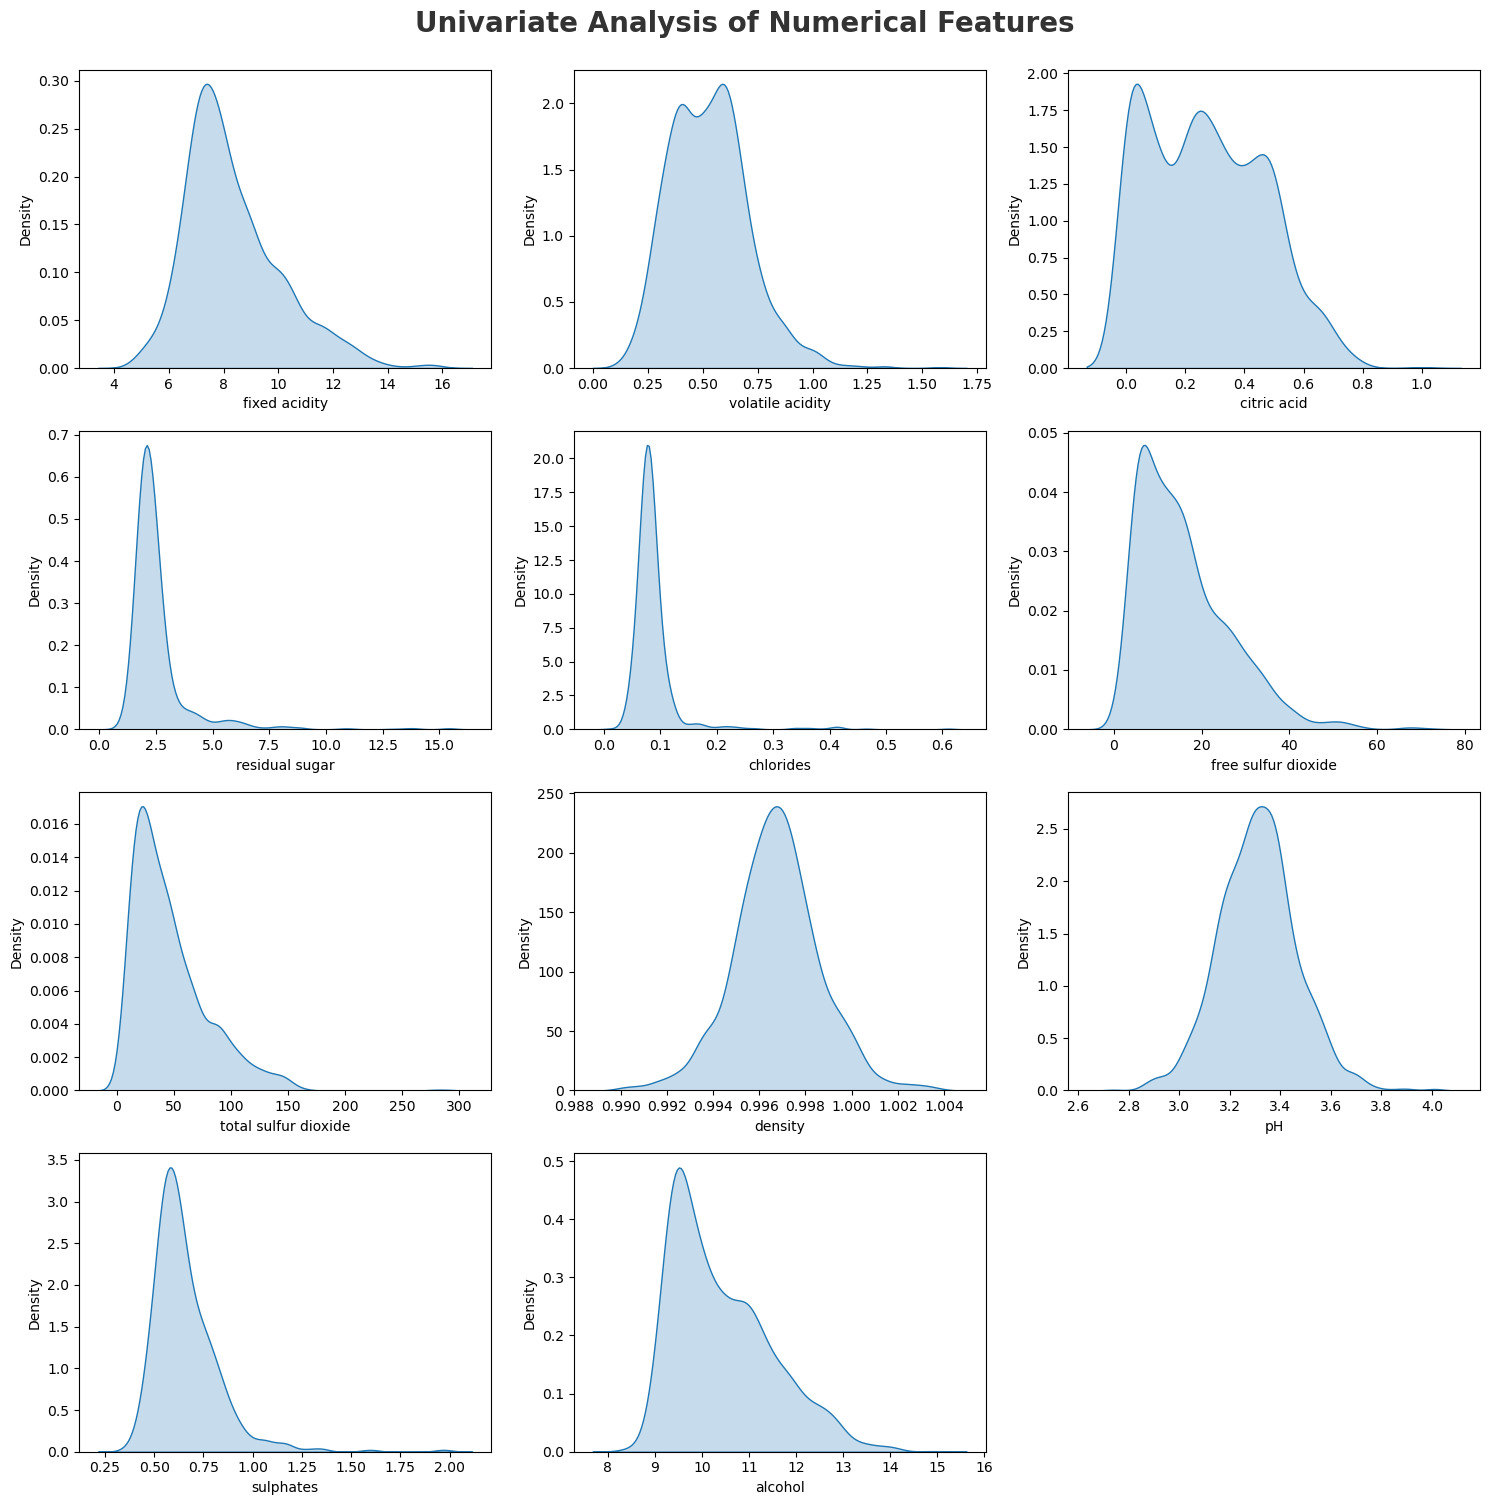

In [11]:
features = list([col for col in df.columns  if col!='quality'])

plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0,len(features)):
    plt.subplot(4,3,i+1)    
    sns.kdeplot(x=df[features[i]], fill=True)
    plt.xlabel=features[i]
    plt.tight_layout()

#### From the above plots, we can say that the following features show Non-normality:

- volatile acidity
- citric acid 
- alcohol
- free sulfur dioxide
- total sulfur dioxide

#### Here are some common transformations that can be applied to achieve better normality:

- **Log Transformation:** When the data is positively skewed (skewed to the right), a log transformation can help spread out the lower values and compress the higher values, making the distribution more symmetrical.

    Formula: $Transformed\_value = \log(original\_value)$

- **Square Root Transformation:** When to use: Similar to the log transformation, square root transformation is useful for positively skewed data. It tends to work well when the range of values is not too large.

    Formula: $Transformed\_value = \sqrt{original\_value}$

- **Reciprocal Transformation:** When to use: When the data is negatively skewed (skewed to the left), the reciprocal transformation can help shift the focus towards the lower values and make the distribution more symmetrical.

    Formula: $Transformed\_value = \frac{1}{original\_value}$

- **Exponential Transformation:** When to use: When the data exhibits a reverse J-shaped distribution, an exponential transformation can be applied to emphasize the lower values and reduce the higher values.

    Formula: $Transformed\_value = e^{original\_value}$

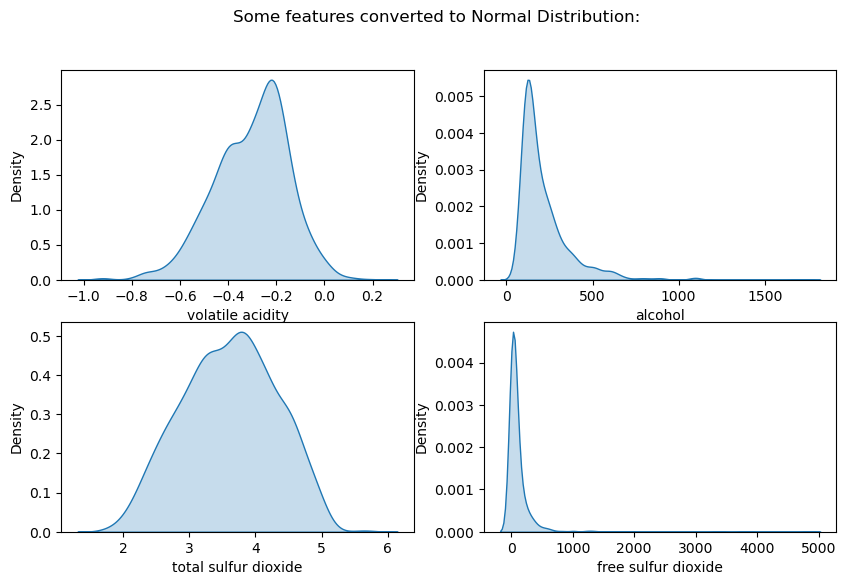

In [12]:
plt.subplots(2,2,figsize=(10,6))
plt.suptitle('Some features converted to Normal Distribution:')

plt.subplot(221)
sns.kdeplot(x=np.log10(df['volatile acidity']), fill=True)

plt.subplot(222)
sns.kdeplot(x=np.sqrt(np.exp(df['alcohol'])), fill=True)

plt.subplot(223)
sns.kdeplot(x=np.log(df['total sulfur dioxide']), fill=True)

plt.subplot(224)
sns.kdeplot(x=np.exp(np.sqrt(df['free sulfur dioxide'])), fill=True)

plt.show()

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

Ans. Solution using pyhton is as follows:

In [19]:
from sklearn.decomposition import PCA

pca=PCA()
X = df.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [67]:
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325,0.223874,0.143165,-0.089312,-0.015483,0.000243
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114,0.136190,0.058480,-0.084793,-0.005749,0.000346
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092,-0.218923,-0.062244,0.006281,0.004586,-0.000747
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018,0.031547,-0.147051,0.006047,0.008585,0.000262


The method *explained_variance_ratio_ gives* gives the fraction of variance explained by each component obtained through PCA, creating a dataframe:

In [91]:
comp_df = pd.DataFrame(component_names, columns=['Component',])
evar_df = pd.DataFrame(pca.explained_variance_ratio_.round(4)*100,columns=['Percentage of variance explained'])
pca_exp_var = pd.concat([comp_df,evar_df], axis=1)
pca_exp_var

,Component,Percentage of variance explained
0,PC1,94.66
1,PC2,4.84
2,PC3,0.26
3,PC4,0.15
4,PC5,0.09
5,PC6,0.00
6,PC7,0.00
7,PC8,0.00
8,PC9,0.00
9,PC10,0.00


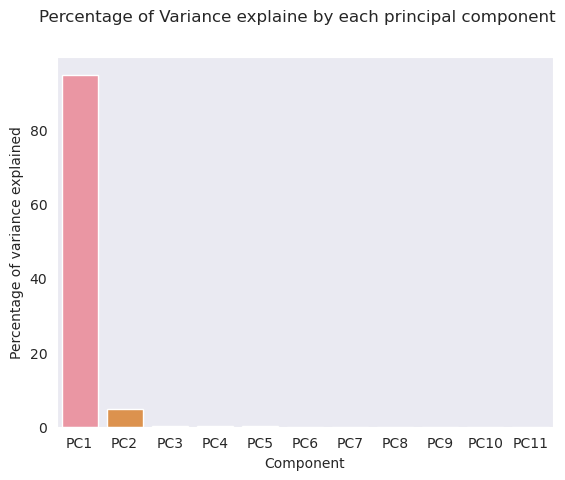

In [100]:
sns.set_style('dark')
sns.set_palette('Set1')
sns.barplot(x=pca_exp_var['Component'], y=pca_exp_var['Percentage of variance explained'])
plt.suptitle('Percentage of Variance explaine by each principal component')
plt.show()

##### Result:
We see that $94.66\%$ of variance is explained by one Principal Component, PC1.

Thus if we use Principal Component Analysis, only 1 principal component is required to explain 90% of the variance in the data.